In [155]:
# !pip install requests
import requests
import pandas as pd
import time

In [102]:
#https://datausa.io
#https://datausa.io/about/api/

In [103]:
url="https://datausa.io/api/data?drilldowns=Nation&measures=Population"
response=requests.get(url).json()

In [ ]:
response

{'data': [{'ID Nation': '01000US',
   'Nation': 'United States',
   'ID Year': 2021,
   'Year': '2021',
   'Population': 329725481,
   'Slug Nation': 'united-states'},
  {'ID Nation': '01000US',
   'Nation': 'United States',
   'ID Year': 2020,
   'Year': '2020',
   'Population': 326569308,
   'Slug Nation': 'united-states'},
  {'ID Nation': '01000US',
   'Nation': 'United States',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 324697795,
   'Slug Nation': 'united-states'},
  {'ID Nation': '01000US',
   'Nation': 'United States',
   'ID Year': 2018,
   'Year': '2018',
   'Population': 322903030,
   'Slug Nation': 'united-states'},
  {'ID Nation': '01000US',
   'Nation': 'United States',
   'ID Year': 2017,
   'Year': '2017',
   'Population': 321004407,
   'Slug Nation': 'united-states'},
  {'ID Nation': '01000US',
   'Nation': 'United States',
   'ID Year': 2016,
   'Year': '2016',
   'Population': 318558162,
   'Slug Nation': 'united-states'},
  {'ID Nation': '01000US',
   'N

In [ ]:
# parsing data

In [ ]:
response["data"][0]

{'ID Nation': '01000US',
 'Nation': 'United States',
 'ID Year': 2021,
 'Year': '2021',
 'Population': 329725481,
 'Slug Nation': 'united-states'}

In [ ]:
response["data"][0]["ID Nation"]

'01000US'

In [ ]:
response["data"][0]["ID Year"]

2021

In [ ]:
response["data"][0]["Population"]

329725481

In [ ]:
response["data"][0]["Slug Nation"]

'united-states'

In [ ]:
response["source"][0]["measures"][0]

'Population'

In [ ]:
for id in response["data"]:
  print(id["ID Nation"])

01000US
01000US
01000US
01000US
01000US
01000US
01000US
01000US
01000US


In [ ]:
# dataframe oluşturmak için bilgiler bir listede toplanır

In [ ]:
nation_list=[]
for nation in response["data"]:
  nation_id=nation["ID Nation"]
  nation_list.append(nation_id)

In [ ]:
year_list=[]
for years in response["data"]:
  year=years["Year"]
  year_list.append(year)

In [ ]:
national_list=[]
for res in response["data"]:
  nation=res["Nation"]
  national_list.append(nation)

In [ ]:
population_list=[]
for population in response["data"]:
  pop=population["Population"]
  population_list.append(pop)

In [ ]:
df=pd.DataFrame(columns=["Population","Nation","Year","Nation ID"],
                data=list(zip(population_list,national_list,year_list,nation_list)))

In [ ]:
df

,Population,Nation,Year,Nation ID
0,329725481,United States,2021,01000US
1,326569308,United States,2020,01000US
2,324697795,United States,2019,01000US
3,322903030,United States,2018,01000US
4,321004407,United States,2017,01000US
5,318558162,United States,2016,01000US
6,316515021,United States,2015,01000US
7,314107084,United States,2014,01000US
8,311536594,United States,2013,01000US


In [ ]:
# aşağıdaki url ise datayı sınırlandırmış sadece year=latest olanları getirir.

In [156]:
url="https://datausa.io/api/data?drilldowns=Nation&measures=Population&year=latest"
employment_response=requests.get(url).json()

In [157]:
employment_response

{'data': [{'ID Nation': '01000US',
   'Nation': 'United States',
   'ID Year': 2021,
   'Year': '2021',
   'Population': 329725481,
   'Slug Nation': 'united-states'}],
 'source': [{'measures': ['Population'],
   'annotations': {'source_name': 'Census Bureau',
    'source_description': 'The American Community Survey (ACS) is conducted by the US Census and sent to a portion of the population every year.',
    'dataset_name': 'ACS 5-year Estimate',
    'dataset_link': 'http://www.census.gov/programs-surveys/acs/',
    'table_id': 'B01003',
    'topic': 'Diversity',
    'subtopic': 'Demographics'},
   'name': 'acs_yg_total_population_5',
   'substitutions': []}]}

In [158]:
# creating workflows

In [159]:
url="https://datausa.io/api/data?drilldowns=State&measures=Population"
response_new=requests.get(url).json()

In [160]:
response_new["data"][0]

{'ID State': '04000US01',
 'State': 'Alabama',
 'ID Year': 2021,
 'Year': '2021',
 'Population': 4997675,
 'Slug State': 'alabama'}

In [161]:
# nation yerine bu sefer state ile populasyon sayısına bakıyoruz

In [162]:
def parse_data_create_dataframe():
  state_list=[state["ID State"] for state in response_new["data"]]
  name_list=[name["Slug State"] for name in response_new["data"]]
  population_list=[population["Population"] for population in response_new["data"]]
  year_list=[year["Year"] for year in response_new["data"]]
  df_new=pd.DataFrame(columns=["state_list","state_name","Population","Year"],data=list(zip(state_list,name_list,population_list,year_list)))
  return df_new

In [163]:
df=parse_data_create_dataframe()

In [164]:
df

,state_list,state_name,Population,Year
0,04000US01,alabama,4997675,2021
1,04000US02,alaska,735951,2021
2,04000US04,arizona,7079203,2021
3,04000US05,arkansas,3006309,2021
4,04000US06,california,39455353,2021
...,...,...,...,...
463,04000US53,washington,6819579,2013
464,04000US54,west-virginia,1853619,2013
465,04000US55,wisconsin,5706871,2013
466,04000US56,wyoming,570134,2013


In [165]:
def state_info(state_name):
  for state_data in response_new["data"]:
    if state_data["Slug State"]==state_name:
      return state_data

In [167]:
state_info("alabama")

{'ID State': '04000US01',
 'State': 'Alabama',
 'ID Year': 2021,
 'Year': '2021',
 'Population': 4997675,
 'Slug State': 'alabama'}

In [171]:
population=df.groupby(["Year"]).sum()

<ipython-input-171-59f62c735c34>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  population=df.groupby(["Year"]).sum()


In [170]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state_list  468 non-null    object
 1   state_name  468 non-null    object
 2   Population  468 non-null    int64 
 3   Year        468 non-null    object
dtypes: int64(1), object(3)
memory usage: 14.8+ KB


<Axes: xlabel='Year'>

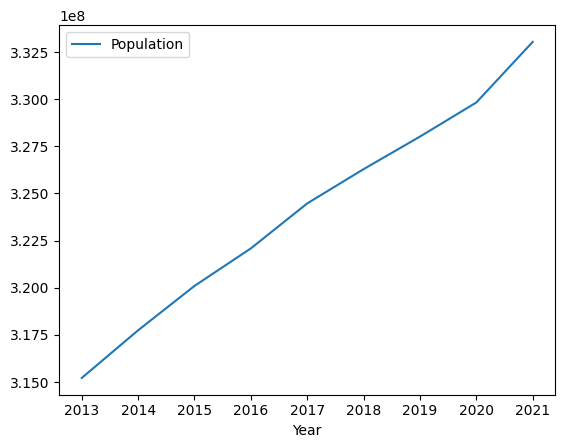

In [172]:
population.plot()

In [175]:
def api_method(url):
  response=requests.get(url).json()
  state_list=[state["ID State"] for state in response["data"]]
  population_list=[pop["Population"] for pop in response["data"]]
  year_list=[year["Year"] for year in response["data"]]
  df=pd.DataFrame(columns=["state_id","Population","Year"],data=list(zip(state_list,population_list,year_list)))
  return df

In [176]:
api_method(url)

,state_id,Population,Year
0,04000US01,4997675,2021
1,04000US02,735951,2021
2,04000US04,7079203,2021
3,04000US05,3006309,2021
4,04000US06,39455353,2021
...,...,...,...
463,04000US53,6819579,2013
464,04000US54,1853619,2013
465,04000US55,5706871,2013
466,04000US56,570134,2013
